In [1]:
%run PolyPy_load_data.ipynb
%run PolyPy_load_torch_v2.ipynb
# %run PolyPy_autoencoder.ipynb
print('\nDone')

database imported:	CROW Polymer Database
PyTorch implemented:	Feed-Forward Neural Network (FFNN)

Done


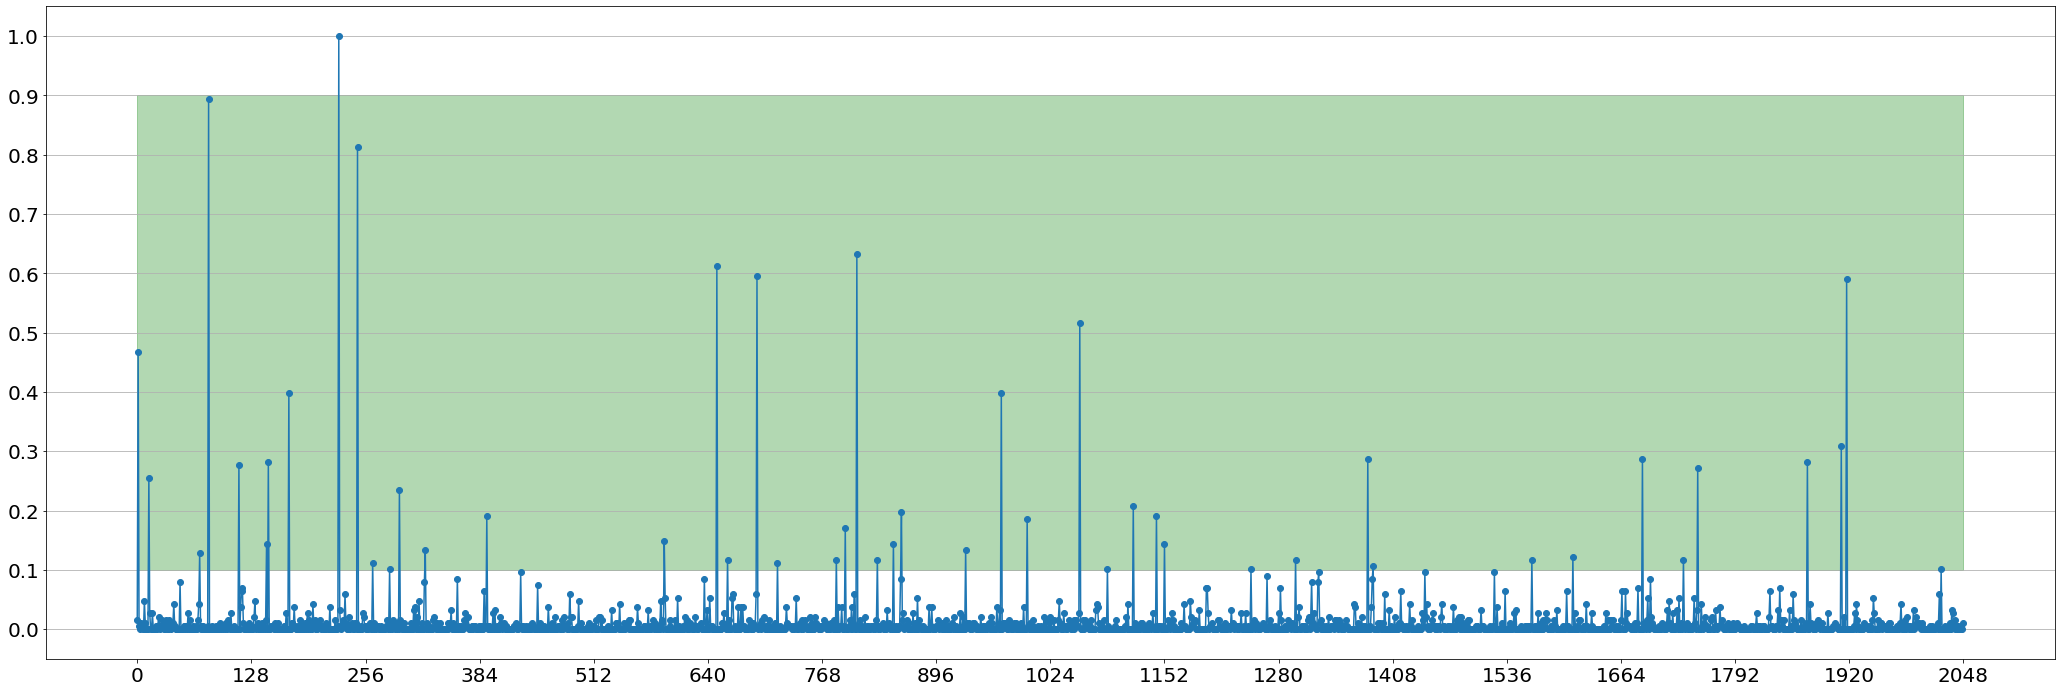

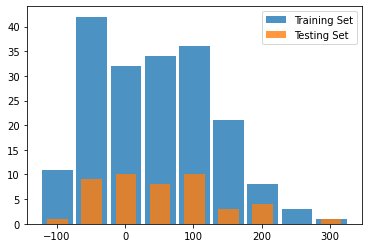

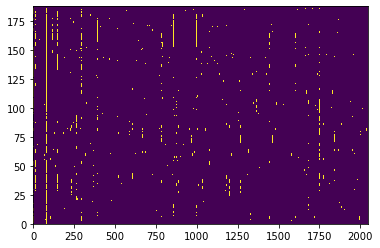

X_train.shape: (188, 2048) 



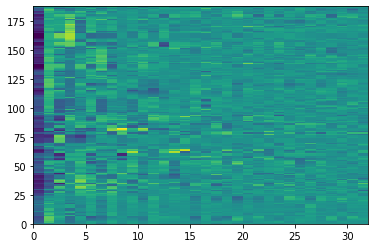

X_train_svd.shape: (188, 32) 



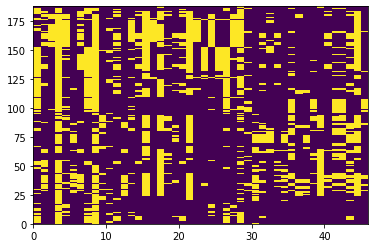

X_train_pruned.shape: (188, 46) 



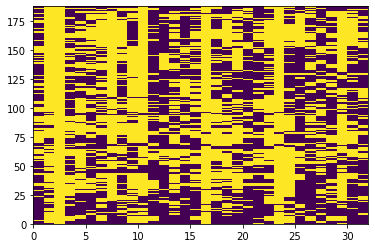

X_train_32.shape: (188, 32) 

#----------------------------------------------------------------------


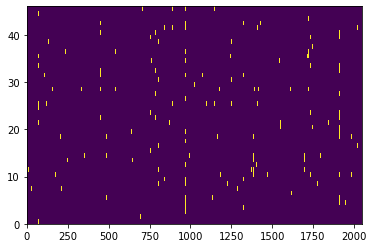

X_test.shape: (46, 2048)


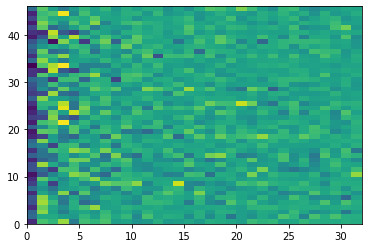

X_test_svd.shape: (46, 32) 



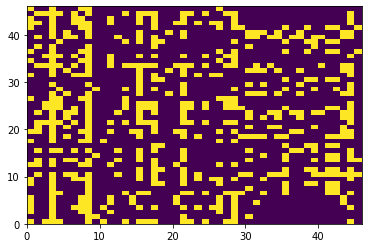

X_test_pruned.shape: (46, 46) 



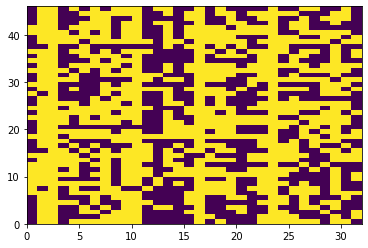

X_test_32.shape: (46, 32) 



In [2]:
X_train, y_train, X_test, y_test, test_index = train_test_split(crow_fp_2048, crow_Tg_Celsius, return_test_indices=True)
keep_index, X_train_pruned = prune_fingerprints(X_train, showPlot=True)
X_test_pruned = X_test[:,keep_index]
X_svd = partial_svd(np.vstack([X_train, X_test]), 32)
X_train_svd = X_svd[:len(y_train),:]
X_test_svd = X_svd[-len(y_test):,:]

crow_fp_32 = fingerprints_matrix(crow_mols, 32)
train_index = np.array([i for i in range(len(crow_Tg_Celsius)) if i not in test_index])
X_train_32 = crow_fp_32[train_index,:]
X_test_32 = crow_fp_32[test_index,:]

plt.figure()
bins = np.linspace(min(crow_Tg_Celsius), max(crow_Tg_Celsius), 10)
plt.hist(y_train, rwidth=0.9, bins=bins, alpha=0.8, label='Training Set')
plt.hist(y_test, rwidth=0.6, bins=bins, alpha=0.8, label='Testing Set')
plt.legend()

plt.figure()
plt.pcolormesh(X_train)
plt.show()
print('X_train.shape:', X_train.shape, '\n')

plt.figure()
plt.pcolormesh(X_train_svd)
plt.show()
print('X_train_svd.shape:', X_train_svd.shape, '\n')

plt.figure()
plt.pcolormesh(X_train_pruned)
plt.show()
print('X_train_pruned.shape:', X_train_pruned.shape, '\n')

plt.figure()
plt.pcolormesh(X_train_32)
plt.show()
print('X_train_32.shape:', X_train_32.shape, '\n')
print('#----------------------------------------------------------------------')

plt.figure()
plt.pcolormesh(X_test)
plt.show()
print('X_test.shape:', X_test.shape)

plt.figure()
plt.pcolormesh(X_test_svd)
plt.show()
print('X_test_svd.shape:', X_test_svd.shape, '\n')

plt.figure()
plt.pcolormesh(X_test_pruned)
plt.show()
print('X_test_pruned.shape:', X_test_pruned.shape, '\n')

plt.figure()
plt.pcolormesh(X_test_32)
plt.show()
print('X_test_32.shape:', X_test_32.shape, '\n')

X_train.shape:(188, 2048) / y_test.shape:(46,)

Starting 50 trials:	 [#] epochs, r2
[0] 45, 0.83             [1] 68, 0.78             [2] 49, 0.83             [3] 68, 0.79             [4] 49, 0.83             
[5] 46, 0.84             [6] 72, 0.79             [7] 48, 0.8              [8] 69, 0.83             [9] 52, 0.86             
[10] 64, 0.84            [11] 65, 0.83            [12] 43, 0.77            [13] 46, 0.8             [14] 45, 0.85            
[15] 68, 0.81            [16] 67, 0.8             [17] 99, 0.79            [18] 73, 0.81            [19] 45, 0.83            
[20] 57, 0.83            [21] 81, 0.79            [22] 42, 0.82            [23] 86, 0.82            [24] 53, 0.85            
[25] 44, 0.83            [26] 89, 0.82            [27] 62, 0.78            [28] 70, 0.82            [29] 78, 0.79            
[30] 62, 0.83            [31] 68, 0.83            [32] 48, 0.83            [33] 57, 0.79            [34] 46, 0.78            
[35] 58, 0.81            [36] 45, 

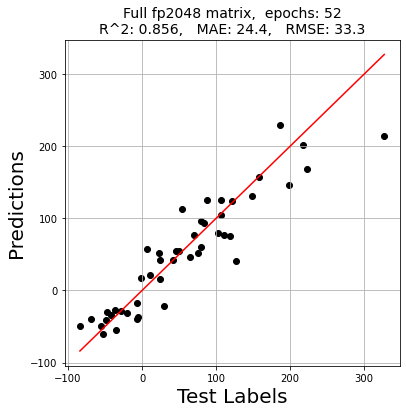

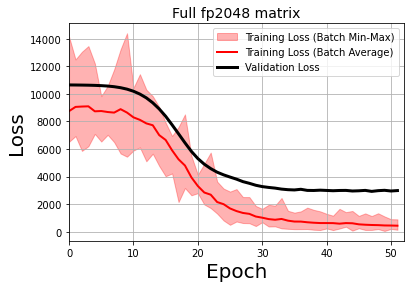

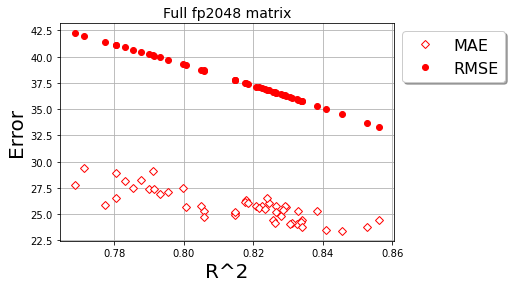

In [3]:
res, r2_vals, mae_vals, rmse_vals = run_nTrials(
                                                get_FFNN(hidden_layers=[32,32,32], epochs=1000, epoch_cutoff=True),
                                                X_train = X_train,
                                                y_train = y_train,
                                                X_test = X_test,
                                                y_test = y_test,
                                                plotTitle = 'Full fp2048 matrix',
                                                plotColor='red',
                                                saveFolder = None,
                                                savePlots = False,
                                                best_metric_tuple = (max, 'r2'),
                                                nTrials=50
                                               )

X_train.shape:(188, 32) / y_test.shape:(46,)

Starting 50 trials:	 [#] epochs, r2
[0] 74, 0.9              [1] 94, 0.9              [2] 123, 0.88            [3] 85, 0.9              [4] 70, 0.89             
[5] 71, 0.89             [6] 89, 0.89             [7] 54, 0.85             [8] 63, 0.88             [9] 142, 0.89            
[10] 67, 0.88            [11] 72, 0.86            [12] 100, 0.9            [13] 96, 0.88            [14] 146, 0.9            
[15] 74, 0.9             [16] 92, 0.88            [17] 60, 0.89            [18] 48, 0.88            [19] 105, 0.9            
[20] 110, 0.88           [21] 76, 0.88            [22] 60, 0.84            [23] 64, 0.86            [24] 76, 0.88            
[25] 81, 0.89            [26] 74, 0.88            [27] 100, 0.89           [28] 59, 0.87            [29] 146, 0.89           
[30] 104, 0.88           [31] 84, 0.86            [32] 174, 0.91           [33] 85, 0.87            [34] 128, 0.91           
[35] 96, 0.91            [36] 45, 0.

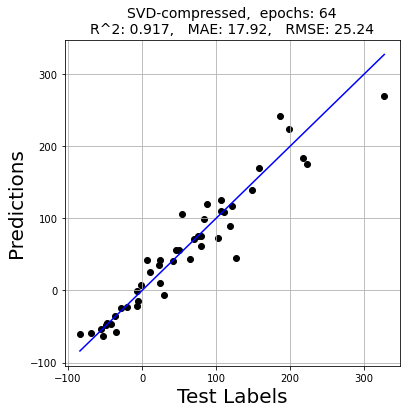

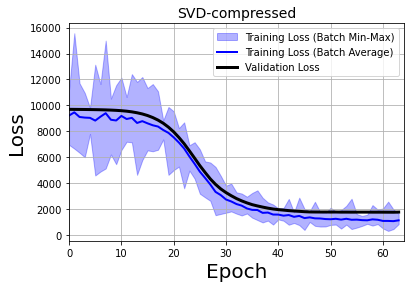

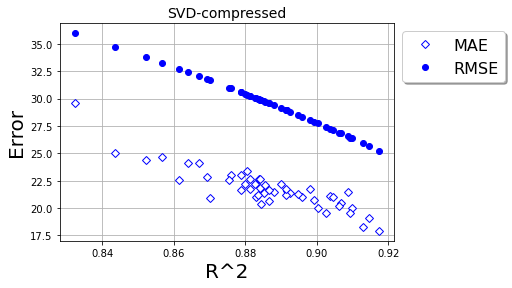

In [4]:
res, r2_vals, mae_vals, rmse_vals = run_nTrials(
                                                get_FFNN(hidden_layers=[32,32,32], epochs=1000, epoch_cutoff=True),
                                                X_train = X_train_svd,
                                                y_train = y_train,
                                                X_test = X_test_svd,
                                                y_test = y_test,
                                                plotTitle = 'SVD-compressed',
                                                plotColor='blue',
                                                saveFolder = None,
                                                savePlots = False,
                                                best_metric_tuple = (max, 'r2'),
                                                nTrials=50
                                               )

X_train.shape:(188, 46) / y_test.shape:(46,)

Starting 50 trials:	 [#] epochs, r2
[0] 87, 0.81             [1] 57, 0.72             [2] 69, 0.76             [3] 38, 0.64             [4] 111, 0.8             
[5] 121, 0.84            [6] 93, 0.81             [7] 72, 0.79             [8] 102, 0.81            [9] 86, 0.79             
[10] 66, 0.69            [11] 120, 0.85           [12] 40, 0.65            [13] 112, 0.87           [14] 79, 0.8             
[15] 110, 0.81           [16] 77, 0.77            [17] 86, 0.78            [18] 81, 0.79            [19] 53, 0.72            
[20] 57, 0.74            [21] 86, 0.75            [22] 37, 0.63            [23] 72, 0.81            [24] 159, 0.86           
[25] 124, 0.83           [26] 51, 0.69            [27] 52, 0.73            [28] 238, 0.87           [29] 56, 0.72            
[30] 67, 0.74            [31] 70, 0.78            [32] 132, 0.86           [33] 46, 0.7             [34] 92, 0.77            
[35] 152, 0.85           [36] 68, 0.

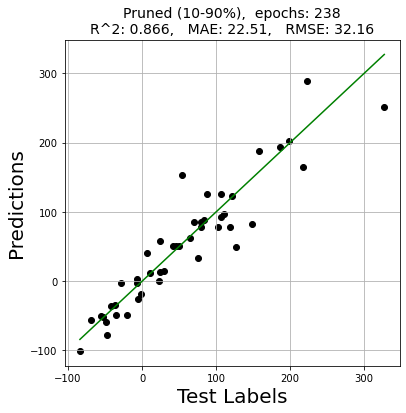

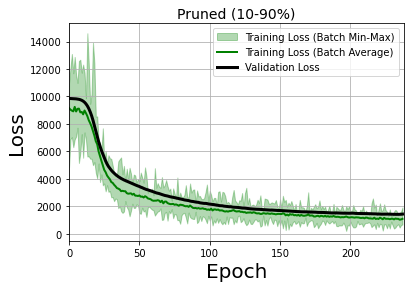

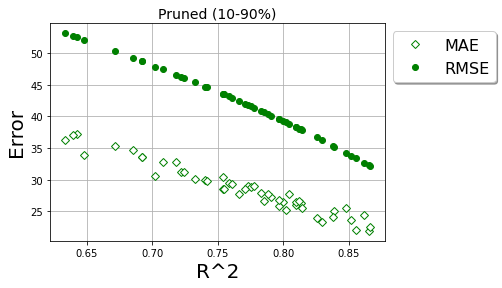

In [5]:
res, r2_vals, mae_vals, rmse_vals = run_nTrials(
                                                get_FFNN(hidden_layers=[32,32,32], epochs=1000, epoch_cutoff=True),
                                                X_train = X_train_pruned,
                                                y_train = y_train,
                                                X_test = X_test_pruned,
                                                y_test = y_test,
                                                plotTitle = 'Pruned (10-90%)',
                                                plotColor='green',
                                                saveFolder = None,
                                                savePlots = False,
                                                best_metric_tuple = (max, 'r2'),
                                                nTrials=50
                                               )

X_train.shape:(188, 32) / y_test.shape:(46,)

Starting 50 trials:	 [#] epochs, r2
[0] 157, 0.35            [1] 70, 0.41             [2] 65, 0.48             [3] 64, 0.43             [4] 88, 0.32             
[5] 61, 0.45             [6] 81, 0.43             [7] 315, 0.32            [8] 55, 0.44             [9] 68, 0.43             
[10] 64, 0.42            [11] 45, 0.42            [12] 51, 0.44            [13] 97, 0.51            [14] 62, 0.41            
[15] 106, 0.43           [16] 66, 0.45            [17] 53, 0.42            [18] 63, 0.42            [19] 77, 0.42            
[20] 69, 0.39            [21] 77, 0.42            [22] 175, 0.41           [23] 50, 0.46            [24] 74, 0.42            
[25] 100, 0.35           [26] 75, 0.39            [27] 111, 0.39           [28] 75, 0.41            [29] 81, 0.44            
[30] 60, 0.41            [31] 98, 0.39            [32] 52, 0.43            [33] 88, 0.37            [34] 61, 0.43            
[35] 72, 0.44            [36] 92, 0.

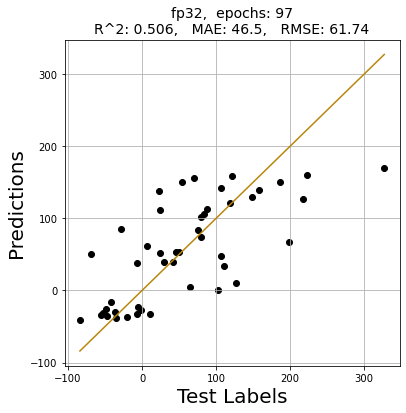

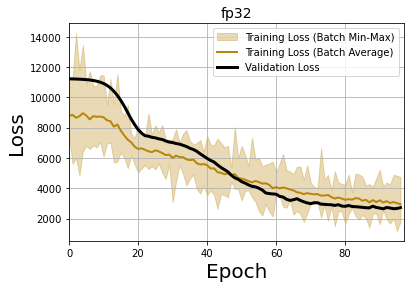

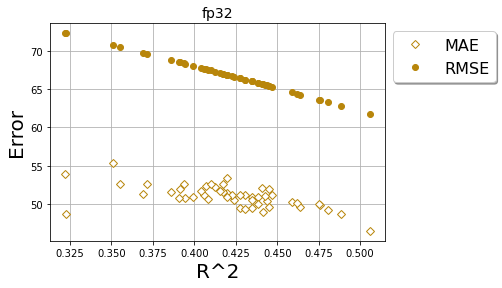

In [6]:
res, r2_vals, mae_vals, rmse_vals = run_nTrials(
                                                get_FFNN(hidden_layers=[32,32,32], epochs=1000, epoch_cutoff=True),
                                                X_train = X_train_32,
                                                y_train = y_train,
                                                X_test = X_test_32,
                                                y_test = y_test,
                                                plotTitle = 'fp32',
                                                plotColor='darkgoldenrod',
                                                saveFolder = None,
                                                savePlots = False,
                                                best_metric_tuple = (max, 'r2'),
                                                nTrials=50
                                               )

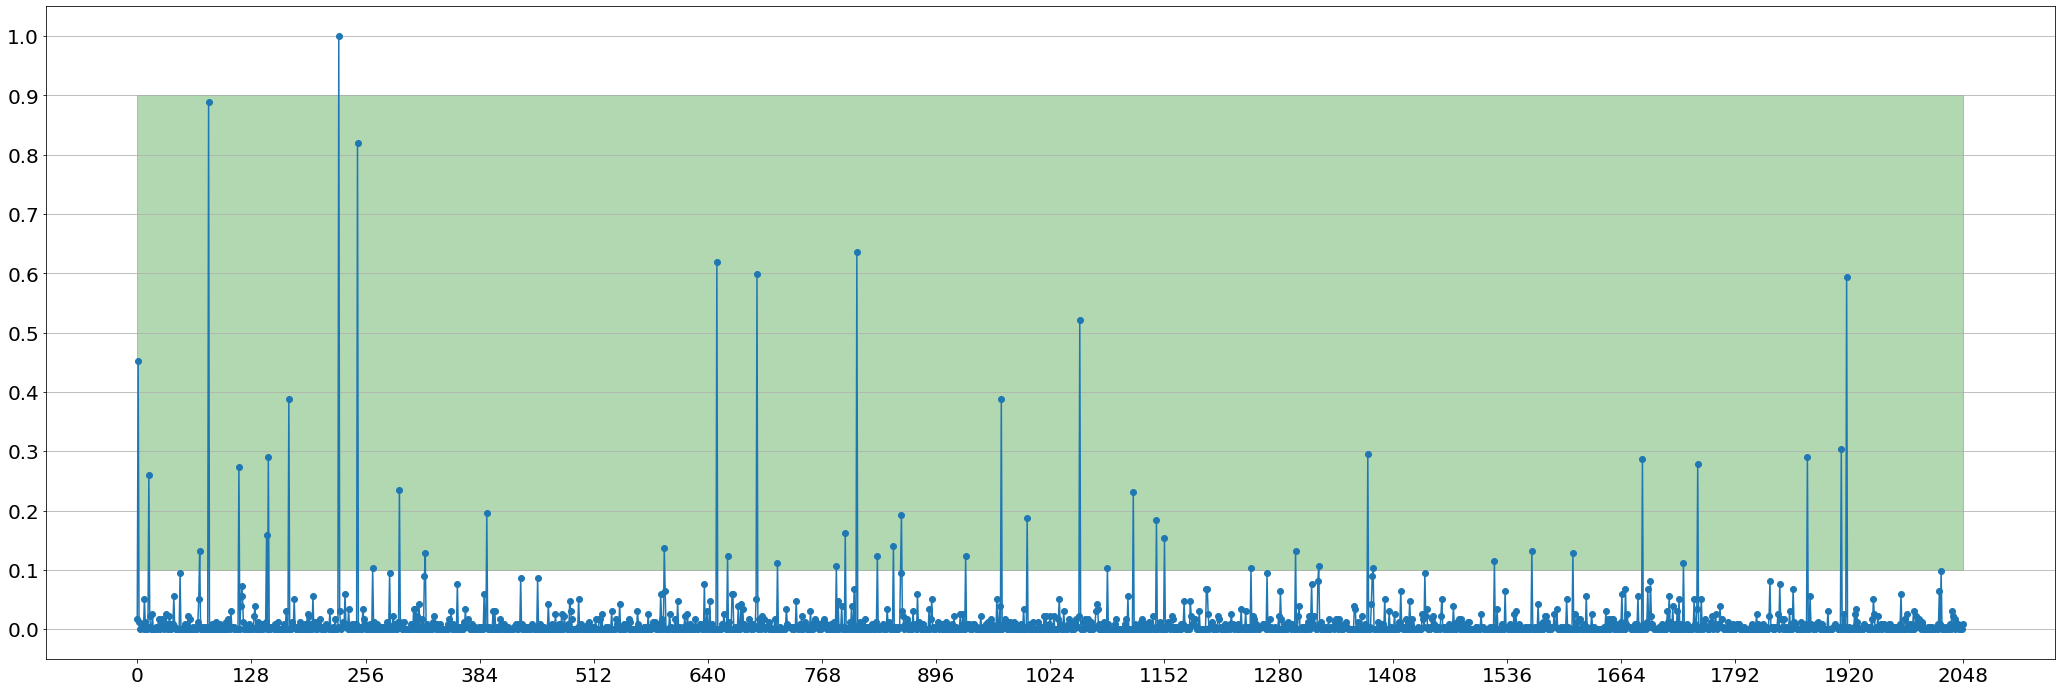

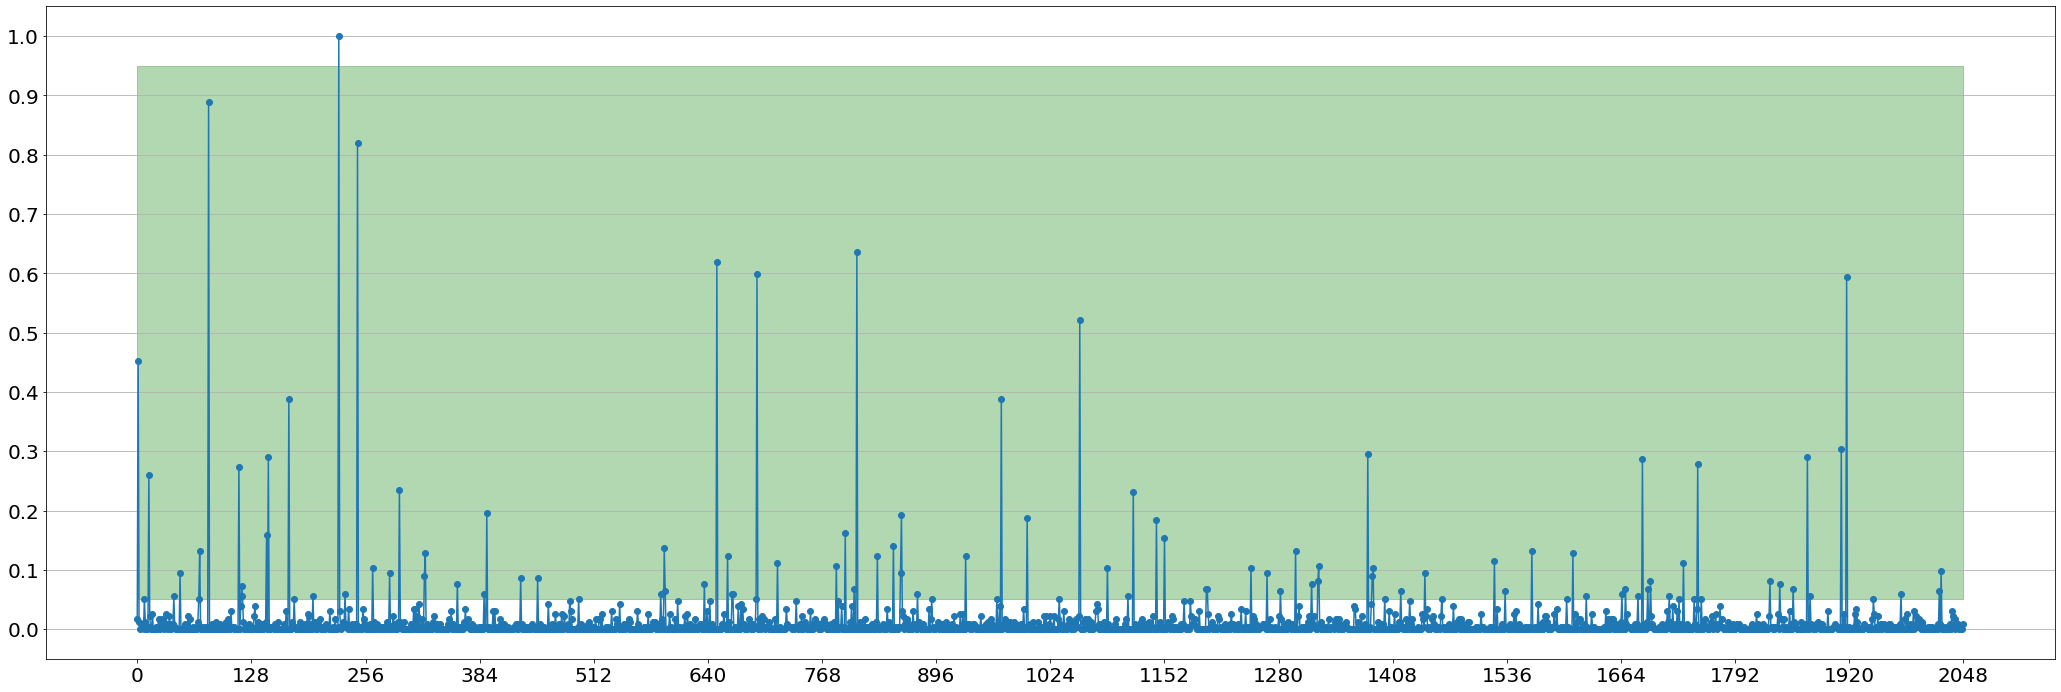

(array([   1,    8,   13,   41,   48,   69,   70,   80,  114,  117,  118,
         145,  147,  170,  176,  197,  233,  247,  264,  283,  294,  322,
         323,  359,  389,  392,  430,  449,  495,  587,  591,  592,  636,
         650,  662,  667,  668,  694,  695,  718,  784,  794,  804,  807,
         830,  848,  856,  857,  875,  891,  929,  964,  969,  998, 1034,
        1057, 1088, 1111, 1117, 1143, 1152, 1199, 1200, 1249, 1267, 1282,
        1299, 1317, 1324, 1325, 1380, 1385, 1386, 1399, 1417, 1444, 1463,
        1522, 1534, 1564, 1603, 1610, 1625, 1665, 1669, 1683, 1688, 1694,
        1697, 1718, 1729, 1734, 1746, 1750, 1754, 1831, 1842, 1857, 1873,
        1876, 1911, 1917, 1947, 1978, 2021, 2023], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [7]:
prune_fingerprints(crow_fp_2048, lower=0.1, upper = 0.9, showPlot=True)
prune_fingerprints(crow_fp_2048, lower=0.05, upper = 0.95, showPlot=True)